# Bond Pricing with Vasicek and Monte Carlo
## Lecture 1 - Monte Carlo

In [1]:
import pandas as pd
from numpy.random import normal as N
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we will simulate N interest rate processes
N_SIMULATIONS = 1000
# we will simulate N steps into future
N_POINTS = 200


def vasicek_monte_carlo(r0, kappa, theta, sigma, T=1.0):
    # timestep 
    dt = T/float(N_POINTS)
    # stores results of simulations
    results = []

    for _ in range(N_SIMULATIONS):
        rates = [r0]
        for _ in range(N_POINTS):
            # Ornstein-Uhlenbeck
            dr = kappa * (theta - rates[-1])* dt  + sigma * N(0, np.sqrt(dt))
            rates.append(rates[-1] + dr)
        results.append(rates)

    simulations = pd.DataFrame(results).T

    return simulations

def plot_simulations(data, theta):
    plt.figure(figsize=(10, 4))
    plt.plot(data, alpha=.5, lw=0.5)
    plt.axhline(theta, lw=1, ls="--", c="k", label=f"θ={theta}")
    plt.legend()
    plt.title(f"Monte-Carlo Simulations of Vasicek Model")
    plt.grid(alpha=.33)
    plt.xlabel("Time $t$")
    plt.ylabel("Interest Rate $r(t)$")

In [3]:
r0=0.1      # initial interest rate
kappa=0.3   # speed of mean reversion
theta=0.1   # long-term mean
sigma=0.03  # volatility

simulations = vasicek_monte_carlo(r0, kappa, theta, sigma)

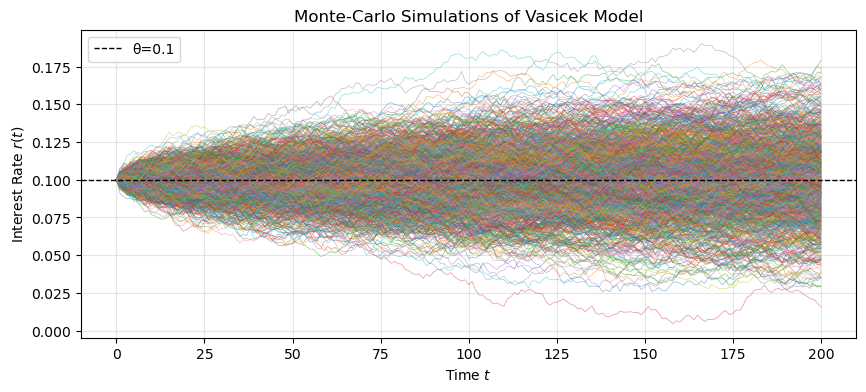

In [4]:
plot_simulations(simulations, theta)

## Lecture 2 - Bond Pricing

In [5]:
def vasicek_bond_pricing(x, simulations, T=1.0):
    # timestep 
    dt = T/float(N_POINTS)
    # calcaute the integral of the r(t) based on simulated paths
    integral_sum = simulations.sum() * dt
    # present value of future cashflow
    present_integral_sum = np.exp(-integral_sum)
    bond_price = x * np.mean(present_integral_sum)

    return bond_price

In [6]:
x = 1e3     # principal investment

pv = vasicek_bond_pricing(x, simulations)

print(f"Bond Price based on Monte-Carlo simulations is = ${pv:,.2f}")

Bond Price based on Monte-Carlo simulations is = $904.38
